<a href="https://colab.research.google.com/github/sivalankapranay/deeplearning/blob/main/exp5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


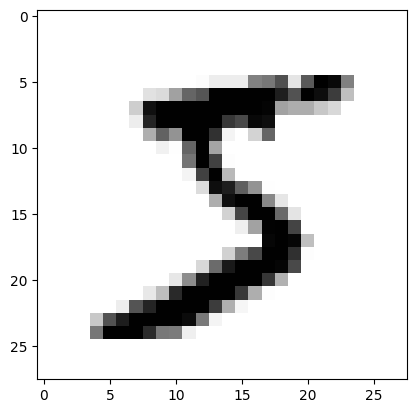

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 6, 6, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,914 (796.54 KB)

 Trainable params: 203,914 (796.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 74s 609ms/step - accuracy: 0.6356 - loss: 1.1254 - val_accuracy: 0.9699 - val_loss: 0.0940
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 81s 604ms/step - accuracy: 0.9460 - loss: 0.1845 - val_accuracy: 0.9826 - val_loss: 0.0521
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 83s 611ms/step - accuracy: 0.9654 - loss: 0.1209 - val_accuracy: 0.9868 - val_loss: 0.0370
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 71s 603ms/step - accuracy: 0.9738 - loss: 0.0931 - val_accuracy: 0.9878 - val_loss: 0.0373
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 80s 585ms/step - accuracy: 0.9802 - loss: 0.0714 - val_accuracy: 0.9871 - val_loss: 0.0393
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 83s 595ms/step - accuracy: 0.9812 - loss: 0.0649 - val_accuracy: 0.9917 - val_loss: 0.0250
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 69s 585ms/step - accuracy: 0.9833 - loss: 0.0589 - val_accuracy: 0.9922 - val_loss: 0.0243
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 82s 586ms/step - accuracy: 0.9861 - loss: 0

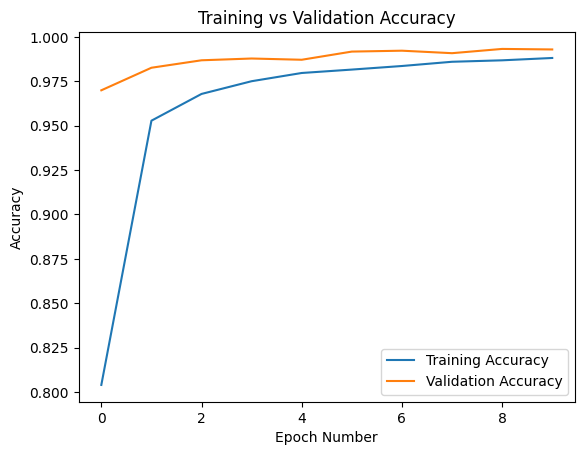

In [11]:
from tensorflow.keras.datasets import mnist
import pandas as pd

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1
pd.DataFrame(x_train[0])
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
x_train = x_train / 255.0
x_test = x_test / 255.0
pd.DataFrame(x_train[0])
import numpy as np
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1), padding="valid", name="Conv1"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="Pool1"))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same", name="Conv2"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid", name="Pool2"))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same", name="Conv3"))
model.add(Flatten(name="Flatten"))

model.add(Dense(64, activation='relu', name="Dense1"))

model.add(Dropout(0.5, name="Dropout"))

model.add(Dense(10, activation='softmax', name="Output"))

model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,batch_size=512, validation_data=(x_test, y_test))
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()